<a href="https://colab.research.google.com/github/amanrana21711/HeartDisease_UB/blob/main/HeartDisease_UB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [70]:
'''I have uploaded the train.csv file in my drive. So i will import it from there'''
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
'''Reading csv via panda'''
data = pd.read_csv('/content/drive/MyDrive/dataset.csv')
data_without_target = data.drop('target',axis = 1).values
target_data = data['target'].values


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_without_target = scaler.fit_transform(data_without_target)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_without_target,target_data,test_size = 0.2,shuffle = True)

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#using long tensor because i will be using cross entropy loss fun later
#hope you get it because i don't

tensor_ds = TensorDataset(x_train,y_train)
tensor_dl = DataLoader(tensor_ds,batch_size = 15,shuffle = True)



In [132]:
class NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(11,22)
    self.act1 = nn.LeakyReLU()
    self.linear2 = nn.Linear(22,44)
    self.act2 = nn.LeakyReLU()
    self.linear3 = nn.Linear(44,2)
  def forward(self,x):
    x = self.linear1(x)
    x = self.act1(x)
    x = self.linear2(x)
    x = self.act2(x)
    x = self.linear3(x)
    return x

model = NN()

opt = torch.optim.Adam(model.parameters(),lr = 0.0003)
loss_fun = nn.CrossEntropyLoss()




ll = []
epochl = []

In [133]:
#let's train this bitch
for epoch in range(1000):


  for xb,yb in tensor_dl:
    preds = model(xb)
    loss = loss_fun(preds,yb)

    loss.backward()

    opt.step()
    opt.zero_grad()



  if epoch%100 ==99:
    print(loss.item())
    ll.append(loss.item())
    epochl.append(epoch)






0.1306246966123581
0.3023240566253662
0.04178270697593689
0.09517962485551834
0.012651742435991764
7.196296064648777e-05
0.0010955187026411295
0.00025233582709915936
2.9307251679711044e-05
6.443446909543127e-05


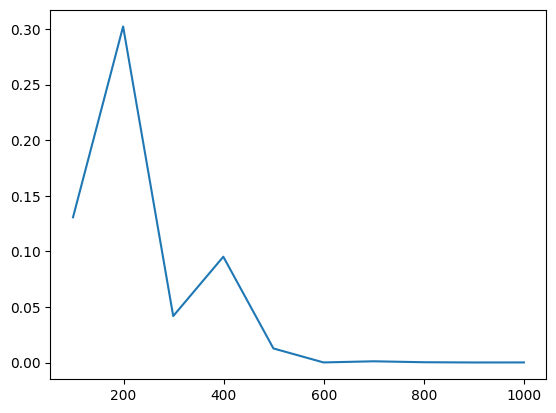

In [134]:
import matplotlib.pyplot as plt

plt.plot(epochl,ll)


In [136]:
preds_new = model(x_test)
preds_new = torch.argmax(preds_new,dim=1)

correct = 0
incorrect = 0

for i in range(len(preds_new)):
  if preds_new[i] == y_test[i]:
    correct += 1
  else:
    incorrect += 1

print(correct,incorrect,incorrect+correct)

213 25 238


In [68]:
'''Forgot to add the scheduler line and due to lack of compute units again can't run the training again. Other than that all good i think the accuracy can be better
by 10 more percent with some tweaks.'''

"Forgot to add the scheduler line and due to lack of compute units again can't run the training again. Other than that all good i think the accuracy can be better\nby 10 more percent with some tweaks."

In [116]:
0.024453120306134224 < 0.001


False